Unit 11, Review
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, April 17 2016

We've seen the following types of regression:

1. Ordinary least squares with 1 x dimension and 1 y dimension (OLS-1D). Solve with equation.
2. Ordinary least squares with N x dimensions and 1  y dimension (OLS-ND). Solve with matrix equation
3. Non-linear least squares with N x dimensions and 1 y dimension (NLS-ND). Solve with SSR minimization

We've seen the following changes we can make to a problem to make regression possible:

1. Linearizing a problem, often polynomials, to make it an N dimensional regression (OSL-ND)
2. Representing categories or yes/no data as binary variables

Finally, we've seen the following modifications due to measurement error:

1. OLS-1D with measurement error in x, y or both. 

Now we'll look at some examples and choose which approach to take from the above types of regression

Exampe 1
---

We have data on the US population below for the years 1998-2016. We would like to be able to predict it for the year 2017


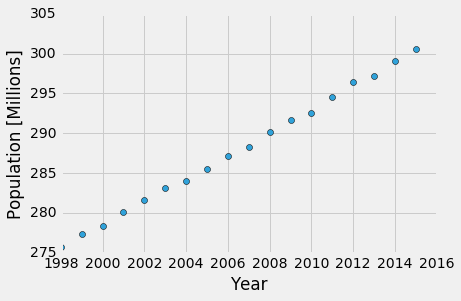

In [30]:
plt.plot(pop_x, pop_y, 'o')
plt.xlabel('Year')
plt.ylabel('Population [Millions]')
plt.show()

Example 1 Answer
----

This is a simple OLS-1D problem. Although population growth is exponential, over this range it is linear enough. 

Exmaple 2
---

We have data on selectivity in a membrane as a function of temperature and if we added graphene nanofibers to the membrane. Fit a model to describe the data. Selectivity is the number of moles of the desired product in the efflux over the number of moles of the undesired product. 

Exmaple 2 Answer
---

This is a 2 dimensional problem: temperature and yes/no graphene fibers. This can be answered using OLS-ND. One more issue though is that we need an intercept. We would not expect selectivity to be 0 at absolute zero. Therefore our x-matrix will have the following columns: $[1, T, \delta_{g}]$ where $\delta_g$ indicates if graphene fibers are used. 

Here's an example of building this with real data. Let's say we did 5 experiments with and 5 experiments without graphene at a range of temperatures. 

In [40]:
graphene_used = np.concatenate( (np.ones(5), np.zeros(5)) )
temperature = np.concatenate( (T, T) )
intercept = np.ones(10)

x_mat = np.column_stack( (intercept, temperature, graphene_used) )
print(x_mat)

[[   1.  280.    1.]
 [   1.  285.    1.]
 [   1.  290.    1.]
 [   1.  295.    1.]
 [   1.  300.    1.]
 [   1.  280.    0.]
 [   1.  285.    0.]
 [   1.  290.    0.]
 [   1.  295.    0.]
 [   1.  300.    0.]]


Example 3
---

We have data on traffic fatalities per at each day of the year and whether or not it's raining. Create a model equation for the data.

Example 3 Answer
---

This is actually a very complex regression. Rather than try to regress against time, we could use the following category variables:

1. Is it a holiday
2. Is it raining
3. Is it a weekend or weekday

Example 4
---

Someone has proposed that conversion efficiency in a chemical reaction depends on the product of the temperature and concentration of one of the reagents. What equation could you use to represent this?

Example 4 Answer
---

We could take two approaches here. We could use non-linear regression over $T$, $c$ and an intercept. This would give an x-matrix of $[T, c, 1]$. OR, we could linearize it to the $T\times c$ dimension. Then our x-matrix would be $[Tc, 1]$

Example 5
---

You are making a regression of reaction rate vs concentration of reactant 1. Through error propogation, you estimate that your reaction rate measurement has an uncertainty of 2.5 inverse seconds. What regression technique should you use?

Example 5 Answer
----

We do not know if it is linear or non-linear, but we will for sure have to use a measurement error technique. The error is in the dependent variable. 

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy.stats as ss

In [42]:
pop_x = np.arange(1998, 2016)
pop_y = 275.9 * np.exp((pop_x - 1998) * 0.005) + ss.norm.rvs(size=len(pop_x)) * 0.2
T = np.arange(280, 280 + 5 * 5, 5)